In [1]:
import nengo
import nengo_loihi
from nxsdk.graph.monitor.probes import PerformanceProbeCondition
from nxsdk.api.n2a import ProbeParameter
import numpy as np

run_time = 0.140
dt = 0.001

############  My code for LDSNN ###################
from ldsnn import get_nengo_ldsnn_model, get_A_p_and_B_p_matrices, get_enc_transform_matrix

d = 10
A_p, B_p = get_A_p_and_B_p_matrices(d)
t_mat = get_enc_transform_matrix(d)
np.random.seed(45)
lyr_e2h = np.random.rand(2*d, 3*d)
np.random.seed(45)
lyr_h2o = np.random.rand(3*d, 2)
x = np.random.rand(int(run_time*1000)) - 1.0

net = get_nengo_ldsnn_model(x, A_p, B_p, t_mat, lyr_e2h, lyr_h2o, d)
################################################

############  My code for SLRC ###################
# from slrc import get_nengo_slrc_model, get_A_p_and_B_p_matrices
# d = 10
# A_p, B_p = get_A_p_and_B_p_matrices(d)
# x = np.random.rand(int(run_time*1000)) - 1.0

# net = get_nengo_slrc_model(x, A_p, B_p, d, n_nrns=100)
################################################

sim = nengo_loihi.Simulator(net, dt=dt)
board = sim.sims["loihi"].nxsdk_board
probe_cond = PerformanceProbeCondition(
    tStart=1, tEnd=int(run_time / dt)*1, bufferSize=1024 * 2, binSize=4
)
e_probe = board.probe(ProbeParameter.ENERGY, probe_cond)

with sim:
    sim.run(run_time)
    
print("Done!!!")

Running the LDSNN network...
INFO:DRV:  SLURM is being run in background


/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nengo_loihi/builder/ensemble.py:164: UserWarning: NengoLoihi does not support initial values for 'voltage' being non-zero on SpikingRectifiedLinear neurons. On the chip, all values will be initialized to zero.
  warnings.warn(


INFO:DRV:  Connecting to 10.212.98.104:41323
INFO:DRV:      Host server up..............Done 0.21s
INFO:DRV:      Encoding axons/synapses.....Done 3.59ms
INFO:DRV:      Compiling Embedded snips....Done 0.27s
INFO:DRV:      Compiling MPDS Registers....Done 0.58ms
INFO:HST:  Args chip=0 cpu=0 /homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1674103407.7524555/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --cpu-active-ratio=1 
INFO:HST:  Nx...
INFO:DRV:      Booting up..................Done 0.78s
INFO:DRV:      Encoding probes.............Done 0.45ms
INFO:DRV:      Transferring probes.........Done 6.31ms
INFO:DRV:      Configuring registers.......Done 4.00ms
INFO:DRV:      Transferring spikes.........Done 0.01s
INFO:DRV:      Executing...................Done 0.09s
INFO:DRV:      Processing timeseries.......Done 0.02s
INFO:DRV:  Executor: 140 timesteps.........Done 0.15s
INFO:HST:  chip=0 cpu=0 halted, status=0x0
Done!!!


/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
e_probe.totalEnergy, e_probe.energyUnits

(72564.272, 'uJ')

# #######################################################

In [3]:
e_probe.energyUnits

'uJ'

In [4]:
print(e_probe.totalEnergyPerTimeStep.shape) # 1D, total energy per timestep for all energy types and phases
print(e_probe.totalEnergyPerTimeStep)
print(np.sum(e_probe.totalEnergyPerTimeStep)) # Matches e_probe.totalEnergy

(140,)
[832.546 553.729 517.022 513.117 533.423 512.336 510.774 521.708 570.13
 525.613 525.613 511.555 510.774 523.27  515.46  511.555 564.663 525.613
 522.489 512.336 511.555 519.365 568.568 520.146 514.679 507.65  517.803
 506.869 516.241 505.307 504.526 501.402 596.684 538.89  523.27  509.993
 505.307 523.27  522.489 513.898 499.84  507.65  501.402 513.117 506.088
 511.555 517.803 509.993 498.278 511.555 511.555 519.365 538.89  520.146
 510.774 512.336 505.307 502.183 499.059 505.307 518.584 503.745 520.927
 511.555 637.296 531.861 502.183 653.697 520.927 518.584 509.993 509.993
 499.84  504.526 513.117 512.336 496.716 512.336 499.059 525.613 510.774
 502.964 518.584 508.431 515.46  506.088 513.117 525.613 515.46  506.869
 492.811 517.022 499.059 502.183 492.811 510.774 517.022 511.555 513.117
 513.898 511.555 506.088 498.278 514.679 506.088 507.65  500.621 505.307
 512.336 517.803 513.898 519.365 524.832 529.518 513.117 508.431 499.84
 505.307 518.584 518.584 508.431 506.088 504.5

In [5]:
e_probe.EnergyType(0), e_probe.EnergyType(1)

(<_EnergyTypeEnum.VDD: 0>, <_EnergyTypeEnum.VDDM: 1>)

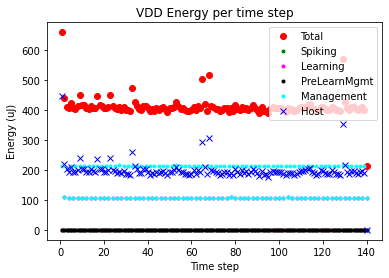

In [6]:
e_probe.plotEnergyType(0) # VDD Plot with energy = NeuroCores + Embedded Lakemont CPU + everything else

In [7]:
e_probe.NUM_ENERGY_VALUES, e_probe.EnergyPhase, e_probe.EnergyType

(140, <enum '_EnergyPhaseEnum'>, <enum '_EnergyTypeEnum'>)

In [8]:
e_probe.totalEnergy

72564.272